# Squirro - Jupyter Notebook Example

This is an example Jupyter Notebook for interacting with Squirro. It shows you how to connect to a Squirro instance, and includes a basic demo using a SquirroClient and some toy Ground Truth data.

## Connecting to Squirro

In [1]:
from squirro_client import SquirroClient

In [2]:
# User Token from the Squirro instance you wish to connect to.
token = ""

# Address of the Squirro instance you wish to connect to (e.g., https://my-instance.squirro.cloud).
cluster = ""

client = SquirroClient(None, None, cluster=cluster)
client.authenticate(refresh_token=token)

/Users/tzabal/squirro-venv/lib/python3.9/site-packages/squirro_client/base.py:332: DeprecationWarning: Using 'method_whitelist' with Retry is deprecated and will be removed in v2.0. Use 'allowed_methods' instead
  retries = self._requests.adapters.Retry(**self.retry)


The full documentation of the SquirroClient can be found here: https://docs.squirro.com/en/latest/squirro_client/

## Basic Demo

Below is a basic demonstration of the SquirroClient in which we fetch some ground truth data from a project, and create a simple plot.

In [3]:
# List the available projects
client.get_projects()

[{'project_role': 'admin',
  'permissions': ['*'],
  'title': 'test',
  'id': 'FNsgQsxWTuqNUQ_HJ5GYig',
  'default_search': None,
  'newsletter_config': None},
 {'project_role': 'admin',
  'permissions': ['*'],
  'title': 'Squirro App Studio',
  'id': 'VLKCfRDwQqC_cYB0r3yNhQ',
  'default_search': None,
  'newsletter_config': None}]

We can see two available projects. We pick the `id` of the one that we want to work on.

In [4]:
project_id = "FNsgQsxWTuqNUQ_HJ5GYig"

In [5]:
# List the Ground Truths of this project
client.get_groundtruths(project_id)

{'groundtruth': [{'id': '5IkrVy0CQOKgKyY7I9FQKw',
   'created_at': '2021-07-23T11:55:02',
   'modified_at': '2021-07-23T12:02:11',
   'project_id': 'FNsgQsxWTuqNUQ_HJ5GYig',
   'name': 'Lorem Ipsum',
   'config': {'description': 'Lorem Ipsum (sentence, pos/neg, rules)',
    'labels': ['pos', 'neg'],
    'sentence_splitter_id': 'JoneKOPmSSOzzLmV8UvI5A',
    'tagging_level': 'sentence',
    'type': 'text+proximity',
    'candidatesets': [{'id': '1fdFKJRiT-Km9i11L1eeEw',
      'created_at': '2021-07-23T11:54:21',
      'modified_at': '2021-07-23T11:54:21',
      'project_id': 'FNsgQsxWTuqNUQ_HJ5GYig',
      'name': 'Lorem Ipsum',
      'query': 'source:BN-cnfzZTzCoN6W29hlrAA'}]},
   'rules': {'C36F8SlOQbq_mc5sUz_VrA': {'is_sequence': True,
     'label': 'pos',
     'labeled_item_id': 'yNGkw---ivBxiP9-ABl0jQ',
     'proximity': 0,
     'query': 'click on the QuickSight icon on the top-left corner and follow the previous steps',
     'type': 'Include'}},
   'labeling_count': 20}]}

From the above output, we can see that there is a single Ground Truth created in this project, called `Lorem Ipsum`. This Ground Truth:
* derived from a Candidate Set with the same name.
* has 2 classification labels: pos, neg.
* contains 20 labeled examples, where each example is a sentence.
* contains 1 proximity rule, which matches the value of the `query` field with the label `pos`.

We pick the `id` of this Ground Truth.

In [6]:
groundtruth_id = "5IkrVy0CQOKgKyY7I9FQKw"

In [7]:
# Fetch and print all the labeled examples of this ground truth
resp = client.get_groundtruth_labels(project_id, groundtruth_id)
labels = resp.get("groundtruth_label", {}).get("labels", [])
for label in labels:
    print(label)

{'extract': 'sed quia consequuntur magni dolores eos qui ratione voluptatem sequi nesciunt', 'label': 'neg', 'candidateset_id': '1fdFKJRiT-Km9i11L1eeEw', 'item_id': 'iQz4uJ7lv3hceCB_2B8mqA', 'keywords': [], 'language': '', 'action': [{'user_id': 'ArSQptwZT46Cy8pLgl2LsQ', 'validity': 'positive', 'created_at': '2021-07-23T11:56:05.144821'}], 'id': 'x0U403oBZVq1OOU4_Paa'}
{'extract': 'quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat', 'label': 'pos', 'candidateset_id': '1fdFKJRiT-Km9i11L1eeEw', 'item_id': 'j-Vr_BgbHZ2VIqUS5Ij7Fg', 'keywords': [], 'language': '', 'action': [{'user_id': 'ArSQptwZT46Cy8pLgl2LsQ', 'validity': 'positive', 'created_at': '2021-07-23T11:56:01.303621'}], 'id': 'uEU403oBZVq1OOU47faZ'}
{'extract': 'vel illum qui dolorem eum fugiat quo voluptas nulla pariatur', 'label': 'pos', 'candidateset_id': '1fdFKJRiT-Km9i11L1eeEw', 'item_id': 'k-y-GTmnvz39556BVcf15g', 'keywords': [], 'language': '', 'action': [{'user_id': 'ArSQptwZT46Cy8pLgl2LsQ

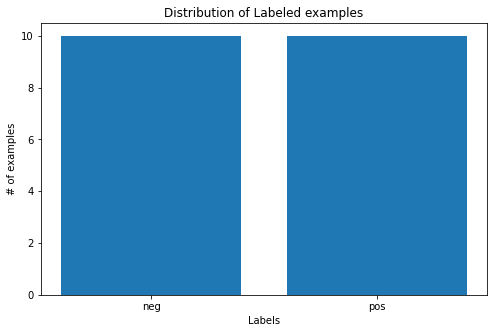

In [8]:
from collections import Counter
label_count_map = Counter([label["label"] for label in labels])

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.bar(label_count_map.keys(), label_count_map.values())
plt.xlabel("Labels")
plt.ylabel("# of examples")
plt.title("Distribution of Labeled examples")
plt.show()